DISTRICT GDP PREDICTION (INDIA)

Objective:
The aim of this project is to develop a machine learning model that can accurately predict the GDP of Indian districts using various socioeconomic and demographic indicators.

The data for this project was sourced from the ICRISAT website(http://data.icrisat.org/dld/), where district-wise socioeconomic and demographic datasets were downloaded.

**Data Preparation Process**

The datasets (e.g., literacy rates, nighttime lights, rural population) were sourced from ICRISAT and stored in separate CSV files. To create a unified dataset for modeling, all features were merged with the main economic dataset (total current and constant prices) using district codes (Dist Code) as the primary key. This ensured alignment of district-level data across socioeconomic, environmental, and infrastructure metrics.

**Importing Libraries**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [29]:
data = pd.read_csv('/content/majordataset.csv')

**DATA DESCRIPTION**

In [30]:
data.head()

,Dist Code,Year_x,State Code_x,State Name_x,Dist Name_x,TOTAL POPULATION (1000 Number),TOTAL RURAL POPULATION,TOTAL URBAN POPULATION (1000 Number),TOTAL RURAL LITERATES POPULATION (1000 Number),TOTAL URBAN LITERATES POPULATION (1000 Number),...,TOTAL URBAN CULTIVATORS POPULATION (1000 Number),TOTAL RURAL AGRICULTURAL LABOUR POPULATION (1000 Number),TOTAL URBAN AGRICULTURAL LABOUR POPULATION (1000 Number),NON AGRICULTURAL WORKERS POPULATION (1000 Number),V4M_NTL,TOTAL_CULTIVABLE_AREA,TOTAL_MARKETS_NUMBER,ROAD_LENGTH_KM,TOTAL CURRENT PRICES (Millions in Rs),TOTAL CONSTANT PRICES (Millions in Rs)
0,1,2011,14,Chhattisgarh,Durg,5465.00,3845.67,1619.33,2386.76,1219.06,...,21.21,932.57,49.91,2881.15,12.044953,1354.50,NaN,NaN,190355,117455
1,2,2011,14,Chhattisgarh,Bastar,3090.83,2672.64,418.19,1141.82,299.87,...,13.63,532.03,18.00,1482.73,1.116059,763.48,NaN,NaN,46649,27915
2,3,2011,14,Chhattisgarh,Raipur,5896.40,4143.77,1752.64,2533.61,1280.95,...,21.69,1114.45,55.22,3236.59,12.363416,1097.68,NaN,NaN,306439,186659
3,4,2011,14,Chhattisgarh,Bilaspur,5728.51,4351.95,1376.57,2481.26,1003.80,...,29.46,1197.53,52.84,3040.45,6.369504,970.40,NaN,NaN,137242,83207
4,5,2011,14,Chhattisgarh,Raigarh,2345.65,2023.36,322.29,1207.97,239.09,...,7.56,509.22,12.13,1168.13,5.075331,564.17,NaN,NaN,86900,52743


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Dist Code                                                 306 non-null    int64  
 1   Year_x                                                    306 non-null    int64  
 2   State Code_x                                              306 non-null    int64  
 3   State Name_x                                              306 non-null    object 
 4   Dist Name_x                                               306 non-null    object 
 5   TOTAL POPULATION (1000 Number)                            305 non-null    float64
 6   TOTAL RURAL POPULATION                                    305 non-null    float64
 7   TOTAL URBAN POPULATION (1000 Number)                      305 non-null    float64
 8   TOTAL RURAL LITERATE

As we can see market number and road length input column have major missing entries so first we have to deal with them the last district chennai has no input so we will drop it

In [32]:
import pandas as pd

# Load your dataset
file_path = 'majordataset.csv'
df = pd.read_csv(file_path)

# Drop the last row
cleaned_df = df.iloc[:-1]

# Optionally, check that the last row is now the previous one
print("New last row after dropping:")
print(cleaned_df.iloc[-1])

# Save the cleaned dataset
cleaned_df.to_csv('majordataset_cleaned.csv', index=False)

# Confirm the new shape
print("Shape after dropping last row:", cleaned_df.shape)

New last row after dropping:
Dist Code                                                         917
Year_x                                                           2011
State Code_x                                                       15
State Name_x                                                Jharkhand
Dist Name_x                                                 Singhbhum
TOTAL POPULATION (1000 Number)                                4861.32
TOTAL RURAL POPULATION                                        3109.94
TOTAL URBAN POPULATION (1000 Number)                          1751.37
TOTAL RURAL LITERATES POPULATION (1000 Number)                1552.75
TOTAL URBAN LITERATES POPULATION (1000 Number)                1295.51
TOTAL RURAL CULTIVATORS POPULATION (1000 Number)               468.71
TOTAL URBAN CULTIVATORS POPULATION (1000 Number)                 4.25
TOTAL RURAL AGRICULTURAL LABOUR POPULATION (1000 Number)       608.56
TOTAL URBAN AGRICULTURAL LABOUR POPULATION (1000 Number)     

Many columns in that dataset have object as type. We will fix this by assigning float/string types to them.

In [33]:
df = pd.read_csv('majordataset_cleaned.csv')
df['State Name_x'] = df['State Name_x'].astype(str)
df['Dist Name_x'] = df['Dist Name_x'].astype(str)
cols_to_convert = df.columns.difference(['State Name_x', 'Dist Name_x'])
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df.to_csv('majordataset_typed.csv', index=False)

In [34]:
data = pd.read_csv('/content/majordataset_typed.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Dist Code                                                 305 non-null    int64  
 1   Year_x                                                    305 non-null    int64  
 2   State Code_x                                              305 non-null    int64  
 3   State Name_x                                              305 non-null    object 
 4   Dist Name_x                                               305 non-null    object 
 5   TOTAL POPULATION (1000 Number)                            305 non-null    float64
 6   TOTAL RURAL POPULATION                                    305 non-null    float64
 7   TOTAL URBAN POPULATION (1000 Number)                      305 non-null    float64
 8   TOTAL RURAL LITERATE

Stastical Analysis

In [35]:
data.describe()

,Dist Code,Year_x,State Code_x,TOTAL POPULATION (1000 Number),TOTAL RURAL POPULATION,TOTAL URBAN POPULATION (1000 Number),TOTAL RURAL LITERATES POPULATION (1000 Number),TOTAL URBAN LITERATES POPULATION (1000 Number),TOTAL RURAL CULTIVATORS POPULATION (1000 Number),TOTAL URBAN CULTIVATORS POPULATION (1000 Number),TOTAL RURAL AGRICULTURAL LABOUR POPULATION (1000 Number),TOTAL URBAN AGRICULTURAL LABOUR POPULATION (1000 Number),NON AGRICULTURAL WORKERS POPULATION (1000 Number),V4M_NTL,TOTAL_CULTIVABLE_AREA,TOTAL_MARKETS_NUMBER,ROAD_LENGTH_KM,TOTAL CURRENT PRICES (Millions in Rs),TOTAL CONSTANT PRICES (Millions in Rs)
count,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,300.000000,305.000000,262.000000,262.000000,3.050000e+02,3.050000e+02
mean,266.006557,2011.0,9.577049,3645.605803,2588.980754,1056.625541,1502.066689,781.800295,358.508098,11.073311,430.849246,22.812131,2185.623541,5.774072,707.004131,10.171756,5379.240458,1.615578e+05,1.007204e+05
std,276.314990,0.0,4.967804,2406.658069,1775.078834,1258.241223,989.298446,973.054051,215.006504,9.252971,369.693699,25.433080,1552.072383,4.648688,469.249805,14.435529,5358.656444,1.845429e+05,1.210019e+05
min,1.000000,2011.0,1.000000,31.560000,31.560000,0.000000,21.850000,0.000000,5.540000,0.000000,0.570000,0.000000,12.270000,0.006158,1.350000,-1.000000,-1.000000,5.021000e+03,3.282000e+03
25%,77.000000,2011.0,6.000000,2092.370000,1523.260000,376.760000,848.790000,270.750000,204.590000,5.090000,183.210000,7.720000,1219.400000,2.497193,391.940000,-1.000000,-1.000000,6.670900e+04,4.015800e+04
50%,154.000000,2011.0,10.000000,3239.770000,2254.700000,662.510000,1333.610000,479.670000,321.750000,9.350000,344.300000,16.720000,1872.370000,4.941725,643.530000,7.000000,4202.500000,1.100870e+05,6.514800e+04
75%,239.000000,2011.0,12.000000,4494.200000,3151.300000,1280.470000,1848.310000,917.240000,469.970000,13.850000,576.040000,28.310000,2673.990000,7.903130,921.820000,16.000000,8054.750000,2.017020e+05,1.219930e+05
max,917.000000,2011.0,20.000000,18171.740000,11993.710000,9286.440000,6970.010000,7306.990000,1093.810000,64.230000,2375.360000,222.680000,11635.630000,48.934510,2721.260000,85.360000,28457.000000,1.795621e+06,1.131929e+06


check If there are any missing datapoints

In [36]:
print(data.isnull().sum())

Dist Code                                                    0
Year_x                                                       0
State Code_x                                                 0
State Name_x                                                 0
Dist Name_x                                                  0
TOTAL POPULATION (1000 Number)                               0
TOTAL RURAL POPULATION                                       0
TOTAL URBAN POPULATION (1000 Number)                         0
TOTAL RURAL LITERATES POPULATION (1000 Number)               0
TOTAL URBAN LITERATES POPULATION (1000 Number)               0
TOTAL RURAL CULTIVATORS POPULATION (1000 Number)             0
TOTAL URBAN CULTIVATORS POPULATION (1000 Number)             0
TOTAL RURAL AGRICULTURAL LABOUR POPULATION (1000 Number)     0
TOTAL URBAN AGRICULTURAL LABOUR POPULATION (1000 Number)     0
NON AGRICULTURAL WORKERS POPULATION (1000 Number)            0
V4M_NTL                                                

since there are some values in TOTAL_MARKETS_NUMBER                                
ROAD_LENGTH_KM are -1 we have to convert them into NaN

In [37]:

# Replace -1 with NaN in specific columns
cols = ['TOTAL_MARKETS_NUMBER', 'ROAD_LENGTH_KM']
data[cols] = data[cols].replace(-1, np.nan)

df.to_csv('majordataset_cleaned_nan.csv', index=False)

In [38]:
print(data.isnull().sum())

Dist Code                                                     0
Year_x                                                        0
State Code_x                                                  0
State Name_x                                                  0
Dist Name_x                                                   0
TOTAL POPULATION (1000 Number)                                0
TOTAL RURAL POPULATION                                        0
TOTAL URBAN POPULATION (1000 Number)                          0
TOTAL RURAL LITERATES POPULATION (1000 Number)                0
TOTAL URBAN LITERATES POPULATION (1000 Number)                0
TOTAL RURAL CULTIVATORS POPULATION (1000 Number)              0
TOTAL URBAN CULTIVATORS POPULATION (1000 Number)              0
TOTAL RURAL AGRICULTURAL LABOUR POPULATION (1000 Number)      0
TOTAL URBAN AGRICULTURAL LABOUR POPULATION (1000 Number)      0
NON AGRICULTURAL WORKERS POPULATION (1000 Number)             0
V4M_NTL                                 

As we can see there are too many values missing in the 2 columns so now we will calculate the percentage of missing values

In [39]:

cols = ['TOTAL_MARKETS_NUMBER', 'ROAD_LENGTH_KM']

# Calculate percentage of missing values for these columns
missing_percent = data[cols].isnull().mean() * 100
print(missing_percent)

TOTAL_MARKETS_NUMBER    54.098361
ROAD_LENGTH_KM          37.049180
dtype: float64


since the missing values in market number is over 50% so we will drop that column and try to impute missing values in Road length

In [40]:
data = data.drop(columns=['TOTAL_MARKETS_NUMBER'])

We’ll use IterativeImputer with other numeric features to predict missing road lengths

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select all numeric columns (excluding non-numeric ones like 'State Name_x')
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Initialize and fit the imputer
imputer = IterativeImputer(random_state=42)
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

In [42]:
print(data.isnull().sum())

Dist Code                                                   0
Year_x                                                      0
State Code_x                                                0
State Name_x                                                0
Dist Name_x                                                 0
TOTAL POPULATION (1000 Number)                              0
TOTAL RURAL POPULATION                                      0
TOTAL URBAN POPULATION (1000 Number)                        0
TOTAL RURAL LITERATES POPULATION (1000 Number)              0
TOTAL URBAN LITERATES POPULATION (1000 Number)              0
TOTAL RURAL CULTIVATORS POPULATION (1000 Number)            0
TOTAL URBAN CULTIVATORS POPULATION (1000 Number)            0
TOTAL RURAL AGRICULTURAL LABOUR POPULATION (1000 Number)    0
TOTAL URBAN AGRICULTURAL LABOUR POPULATION (1000 Number)    0
NON AGRICULTURAL WORKERS POPULATION (1000 Number)           0
V4M_NTL                                                     0
TOTAL_CU

Now we are ok to proceed with EDA as there are no missing values

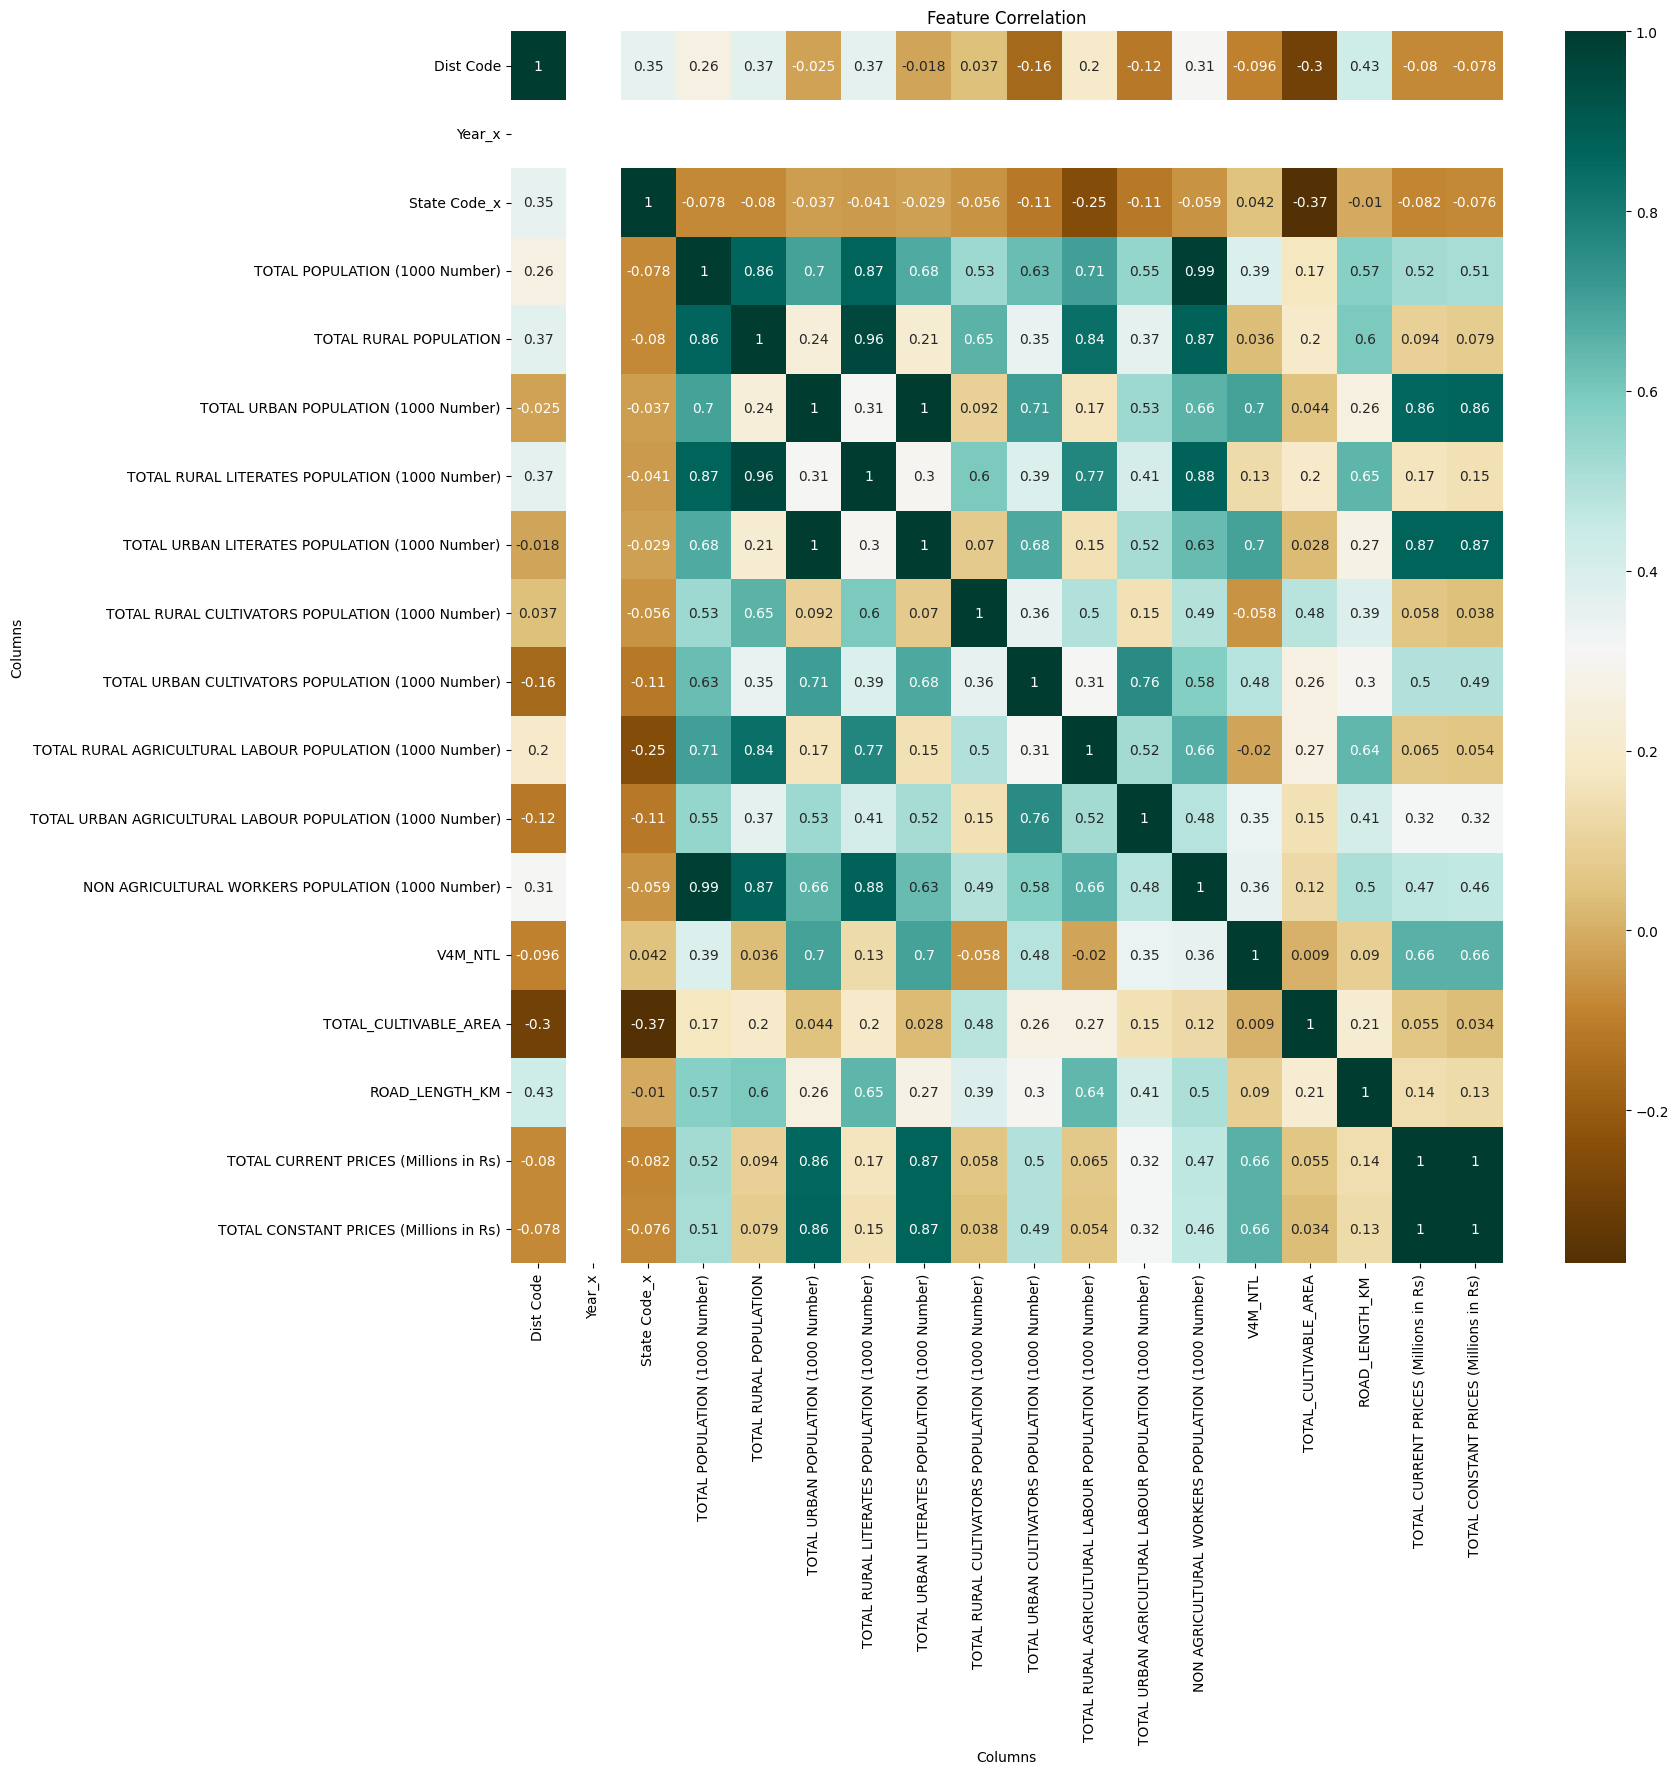

In [43]:

# Select only numeric columns (exclude strings/objects)
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols]

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(numeric_data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title='Feature Correlation', xlabel='Columns', ylabel='Columns'
)
plt.show()


Since we are predicting GDP, so our predicting variables are total current prices and total constant prices, and we want to see how these output features with the available input features

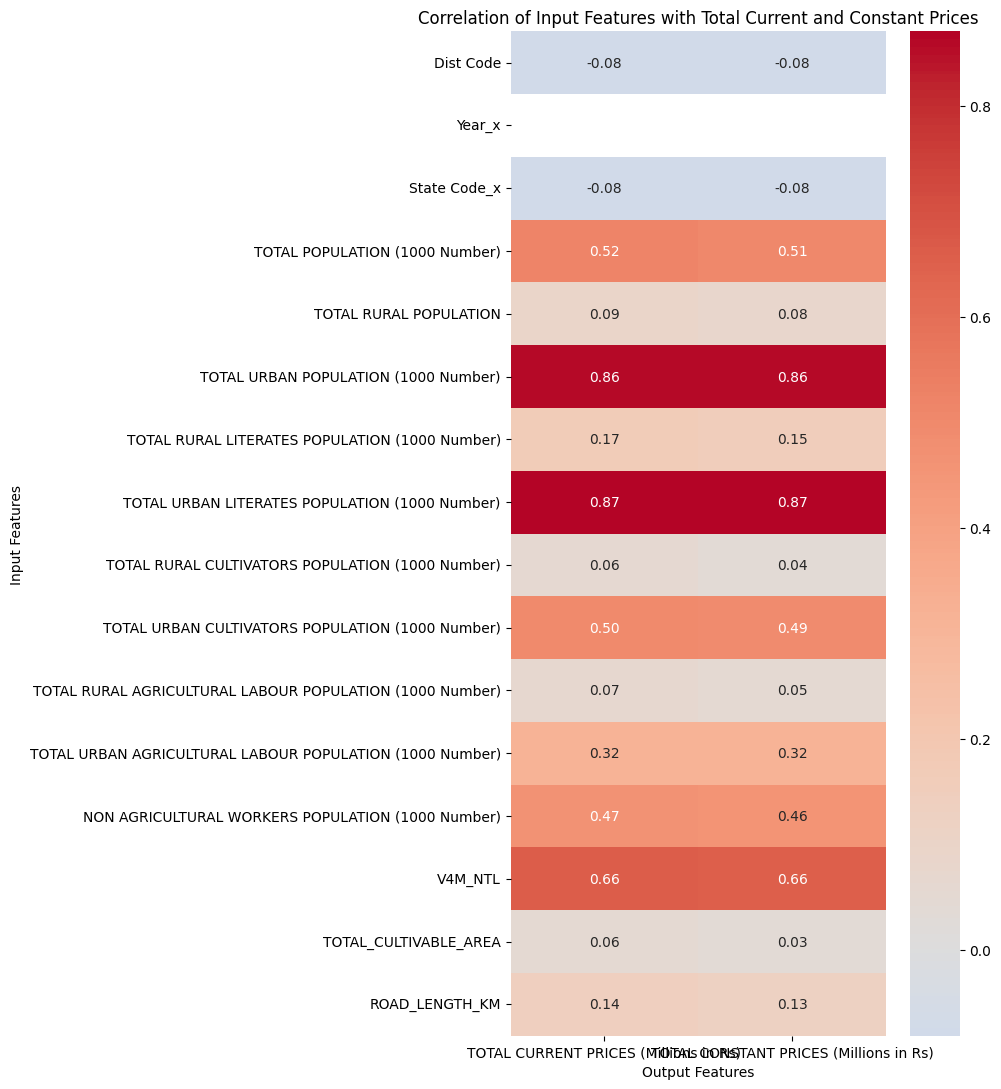

In [44]:

# Define output features
output_features = ['TOTAL CURRENT PRICES (Millions in Rs)', 'TOTAL CONSTANT PRICES (Millions in Rs)']

# Define input features (all columns except output features)
input_features = [col for col in data.columns if col not in output_features]

# Select only numeric input features for correlation
numeric_input_features = data[input_features].select_dtypes(include=['number']).columns

# Calculate correlation matrix
corr_matrix = data[numeric_input_features.union(output_features)].corr()

# Extract correlations of input features with output features
corr_with_targets = corr_matrix.loc[numeric_input_features, output_features]

# Plot heatmap
plt.figure(figsize=(10, len(numeric_input_features)*0.5 + 3))
sns.heatmap(corr_with_targets, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation of Input Features with Total Current and Constant Prices')
plt.xlabel("Output Features")
plt.ylabel("Input Features")
plt.tight_layout()
plt.show()


expected stronge correlation of output features with ->
1. V4M_NTL
2.TOTAL URBAN LITERATES POPULATION
3.TOTAL URBAN POPULATION
4.TOTAL POPULATION
5.NON AGRICULTURAL WORKERS POPULATION
6.TOTAL URBAN CULTIVATORS POPULATION
7. TOTAL URBAN AGRICULTURAL LABOUR POPULATION

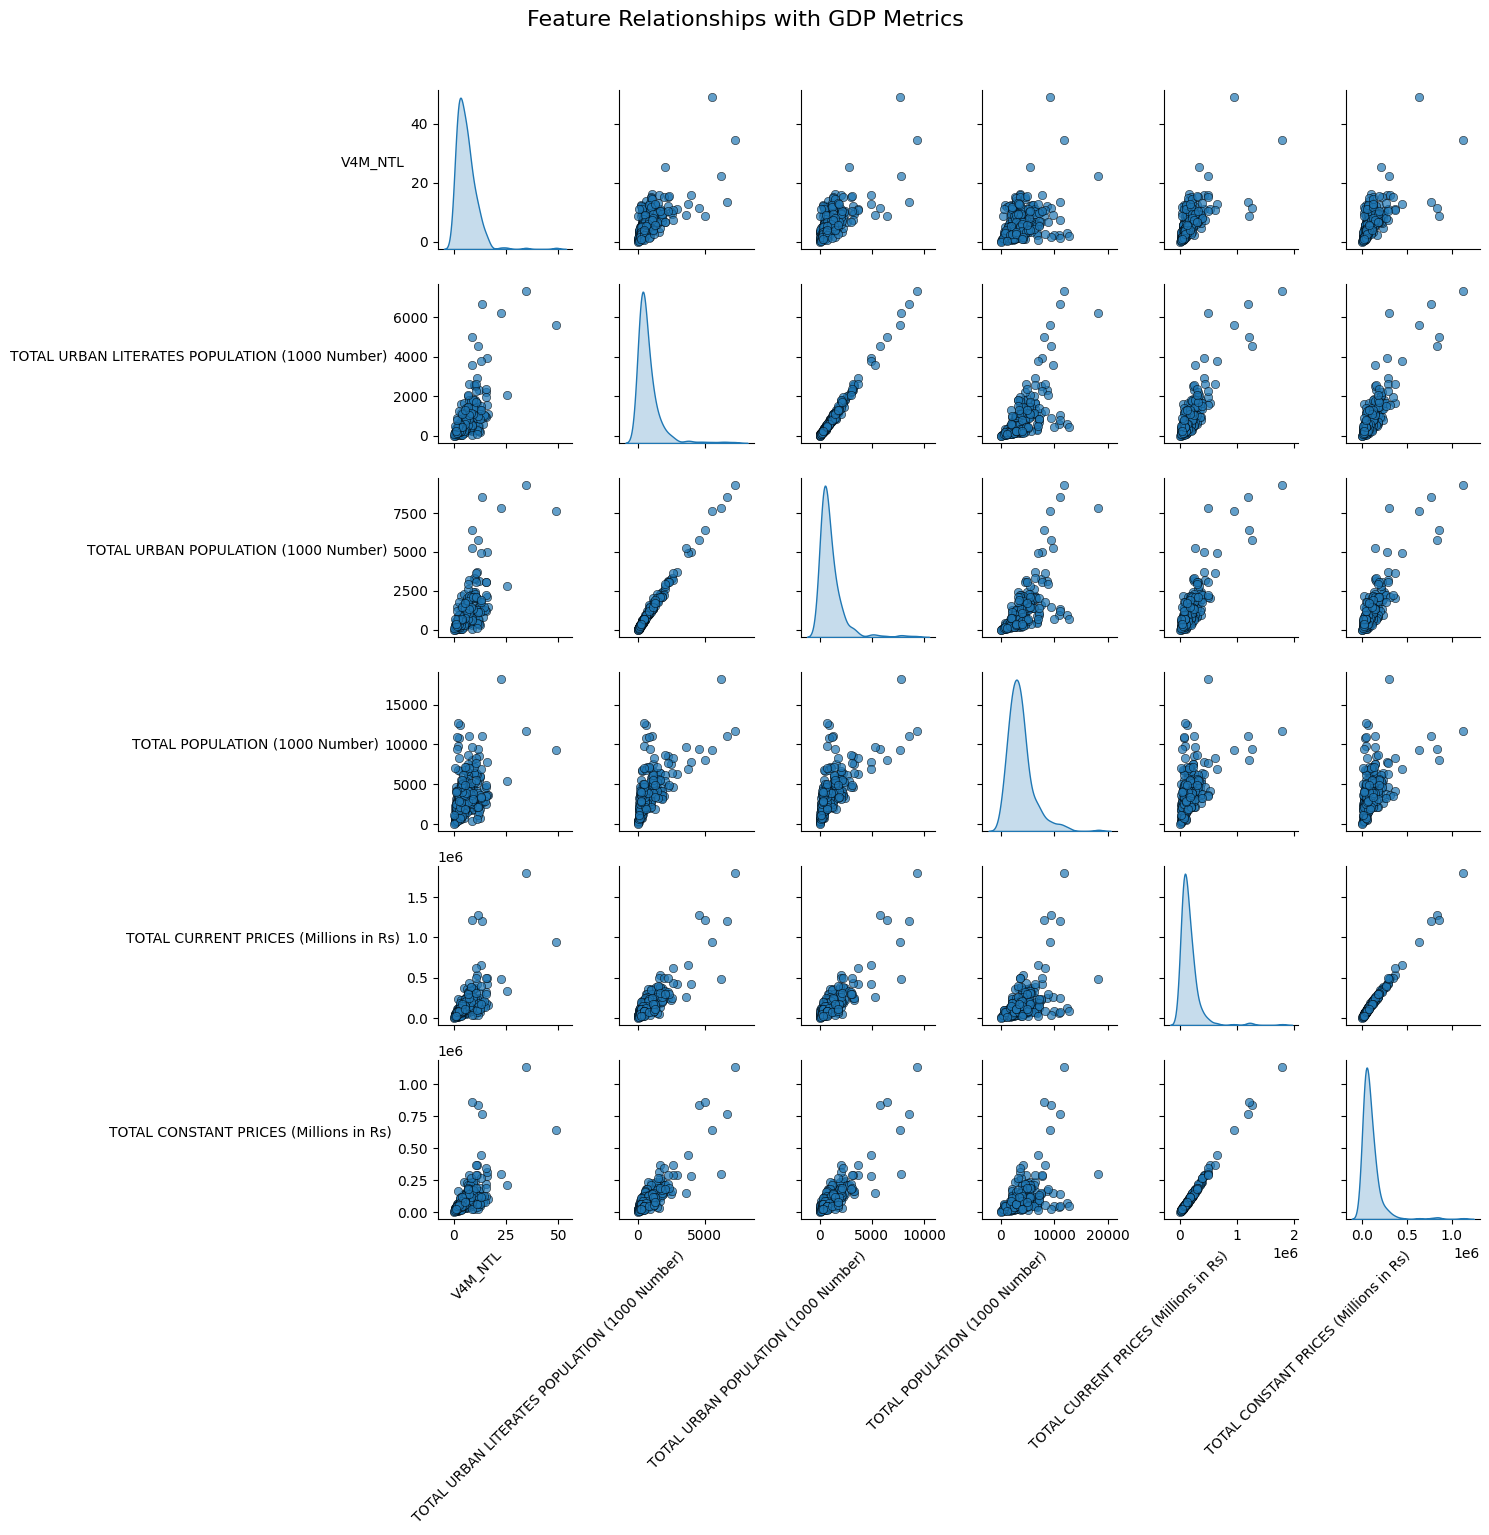

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = [
    'V4M_NTL',
    'TOTAL URBAN LITERATES POPULATION (1000 Number)',
    'TOTAL URBAN POPULATION (1000 Number)',
    'TOTAL POPULATION (1000 Number)',
    'TOTAL CURRENT PRICES (Millions in Rs)',
    'TOTAL CONSTANT PRICES (Millions in Rs)'
]

g = sns.pairplot(
    data[selected_features],
    diag_kind='kde',
    plot_kws={'alpha': 0.7, 'edgecolor': 'black'}
)

g.fig.suptitle('Feature Relationships with GDP Metrics', y=1.02, fontsize=16)

# Remove plt.setp line and directly set labels
for i, ax in enumerate(g.axes[-1]):
    ax.set_xlabel(selected_features[i], rotation=45, ha='right', fontsize=10)
for j, ax in enumerate(g.axes[:,0]):
    ax.set_ylabel(selected_features[j], rotation=0, ha='right', fontsize=10)

plt.tight_layout()
plt.show()


We will use total constant price as our target output and rename it as GDP

In [46]:
data.rename(columns={'TOTAL CONSTANT PRICES (Millions in Rs)': 'GDP'}, inplace=True)

In [47]:
import re

# Remove all content inside brackets (including the brackets) from each column name
data.columns = [re.sub(r'\([^)]*\)', '', col).strip() for col in data.columns]

# Optionally, also remove any extra spaces or trailing underscores
data.columns = [col.strip().replace('  ', ' ').replace(' ', '_') for col in data.columns]


In [48]:
print(data.columns)  # Check the updated column name

Index(['Dist_Code', 'Year_x', 'State_Code_x', 'State_Name_x', 'Dist_Name_x',
       'TOTAL_POPULATION', 'TOTAL_RURAL_POPULATION', 'TOTAL_URBAN_POPULATION',
       'TOTAL_RURAL_LITERATES_POPULATION', 'TOTAL_URBAN_LITERATES_POPULATION',
       'TOTAL_RURAL_CULTIVATORS_POPULATION',
       'TOTAL_URBAN_CULTIVATORS_POPULATION',
       'TOTAL_RURAL_AGRICULTURAL_LABOUR_POPULATION',
       'TOTAL_URBAN_AGRICULTURAL_LABOUR_POPULATION',
       'NON_AGRICULTURAL_WORKERS_POPULATION', 'V4M_NTL',
       'TOTAL_CULTIVABLE_AREA', 'ROAD_LENGTH_KM', 'TOTAL_CURRENT_PRICES',
       'GDP'],
      dtype='object')


In [49]:
data.rename(columns={'GDGDP': 'GDP'}, inplace=True)

In [50]:
print(data.columns)  # Check the updated column name

Index(['Dist_Code', 'Year_x', 'State_Code_x', 'State_Name_x', 'Dist_Name_x',
       'TOTAL_POPULATION', 'TOTAL_RURAL_POPULATION', 'TOTAL_URBAN_POPULATION',
       'TOTAL_RURAL_LITERATES_POPULATION', 'TOTAL_URBAN_LITERATES_POPULATION',
       'TOTAL_RURAL_CULTIVATORS_POPULATION',
       'TOTAL_URBAN_CULTIVATORS_POPULATION',
       'TOTAL_RURAL_AGRICULTURAL_LABOUR_POPULATION',
       'TOTAL_URBAN_AGRICULTURAL_LABOUR_POPULATION',
       'NON_AGRICULTURAL_WORKERS_POPULATION', 'V4M_NTL',
       'TOTAL_CULTIVABLE_AREA', 'ROAD_LENGTH_KM', 'TOTAL_CURRENT_PRICES',
       'GDP'],
      dtype='object')


Data Split 1 (All Features, No Scaling)

In [51]:

# Define features and target
y = data['GDP']
X = data.drop(['GDP', 'TOTAL_CURRENT_PRICES', 'State_Name_x', 'Dist_Name_x'], axis=1)

# Split data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
print("Split 1 (all, no scaling):")
print("Train:", X_train1.shape, "Test:", X_test1.shape)


Split 1 (all, no scaling):
Train: (244, 16) Test: (61, 16)


Cell 2: Data Split 2 (All Features, With Scaling)

In [58]:

from sklearn.preprocessing import StandardScaler

# Initialize scaler
sc_X = StandardScaler()

# Scale training data (fit + transform)
X2_train = sc_X.fit_transform(X_train1)

# Scale test data (transform only, using training parameters)
X2_test = sc_X.transform(X_test1)

# Targets remain unchanged
y2_train = y_train1
y2_test = y_test1

print("Split 2 (all, scaled):")
print("Train:", X2_train.shape, "Test:", X2_test.shape)


Split 2 (all, scaled):
Train: (244, 16) Test: (61, 16)


In [59]:
X2_train

array([[ 1.97692254,  0.        ,  0.72814671, ..., -0.14055307,
        -0.14499471,  0.79625731],
       [-0.15094067,  0.        ,  0.52439924, ..., -0.61048087,
        -0.10775842, -0.49464049],
       [-0.20923829,  0.        ,  0.52439924, ..., -0.73485457,
        -0.64497559, -0.81302035],
       ...,
       [-0.56631123,  0.        , -0.49433814, ...,  0.11161748,
         2.615499  ,  1.01325579],
       [ 1.62349321,  0.        , -0.29059066, ..., -1.01145875,
        -0.32543423,  0.9232644 ],
       [-0.58088563,  0.        , -0.49433814, ...,  0.21439839,
         0.49616029,  0.27070212]])

 Data Split 3 (Selected Features, No Scaling)

In [60]:

# Define output and selected features
y3 = data['GDP']
selected_features = [
    'V4M_NTL',
    'TOTAL_URBAN_LITERATES_POPULATION',
    'TOTAL_URBAN_POPULATION',
    'TOTAL_POPULATION',
    'NON_AGRICULTURAL_WORKERS_POPULATION',
    'TOTAL_URBAN_CULTIVATORS_POPULATION',
    'TOTAL_URBAN_AGRICULTURAL_LABOUR_POPULATION'
]
X3 = data[selected_features]

# Split data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

print("Split 3 (selected, no scaling):")
print("Train:", X3_train.shape, "Test:", X3_test.shape)


Split 3 (selected, no scaling):
Train: (244, 7) Test: (61, 7)


In [61]:

# Initialize scaler
sc_X4 = StandardScaler()

# Fit scaler ONLY on training data, then transform both train/test
X4_train = sc_X4.fit_transform(X3_train)  # Fit and transform train
X4_test = sc_X4.transform(X3_test)        # Transform test (no fit!)

# Targets remain unchanged
y4_train = y3_train
y4_test = y3_test

print("Split 4 (selected, scaled):")
print("Train:", X4_train.shape, "Test:", X4_test.shape)


Split 4 (selected, scaled):
Train: (244, 7) Test: (61, 7)


In [62]:
X4_train

array([[-0.64695956, -0.73618629, -0.77852624, ..., -1.14486033,
        -1.17876035, -0.99936564],
       [-0.40800285,  0.06821186,  0.14124613, ..., -0.02023152,
        -0.02579269, -0.60321558],
       [ 0.22227477,  0.21274171,  0.27395283, ..., -0.22510772,
         0.57060701, -0.02744749],
       ...,
       [ 0.76365421,  1.75753427,  1.73300784, ...,  1.00278172,
         5.61201461,  6.58510727],
       [ 5.33207117,  6.67901938,  6.54648407, ...,  2.66443764,
         3.40835   ,  1.58326263],
       [-0.97688049, -0.70044942, -0.73875416, ..., -0.89479855,
        -0.79013166, -0.63517769]])

LINEAR REGRESSION RESULTS

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize Linear Regression model
model_one = LinearRegression()

# Define splits (using your existing splits)
splits = [
    (X_train1, X_test1, y_train1, y_test1, "Split 1 (all, no scaling)"),
    (X2_train, X2_test, y2_train, y2_test, "Split 2 (all, scaled)"),  # Same y as Split 1
    (X3_train, X3_test, y3_train, y3_test, "Split 3 (selected, no scaling)"),
    (X4_train, X4_test, y3_train, y3_test, "Split 4 (selected, scaled)")  # Same y as Split 3
]

# Evaluate all splits
results = {}
for X_train, X_test, y_train, y_test, split_name in splits:
    model_one.fit(X_train, y_train)
    y_pred = model_one.predict(X_test)

    results[split_name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T.round(2)
print(results_df)


                                     MAE      RMSE    R2
Split 1 (all, no scaling)       44566.74  90355.99  0.79
Split 2 (all, scaled)           44566.74  90355.99  0.79
Split 3 (selected, no scaling)  30264.78  57579.99  0.77
Split 4 (selected, scaled)      30264.78  57579.99  0.77


RIDGE REGRESSION RESULTS

In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Ridge Regression (model2)
model2 = Ridge(alpha=1.0)  # Default regularization strength

# Define splits (same as before)
splits = [
    (X_train1, X_test1, y_train1, y_test1, "Split 1 (all, no scaling)"),
    (X2_train, X2_test, y2_train, y2_test, "Split 2 (all, scaled)"),  # Same y as Split 1
    (X3_train, X3_test, y3_train, y3_test, "Split 3 (selected, no scaling)"),
    (X4_train, X4_test, y3_train, y3_test, "Split 4 (selected, scaled)")  # Same y as Split 3
]

# Evaluate Ridge on all splits
ridge_results = {}
for X_train, X_test, y_train, y_test, split_name in splits:
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)

    ridge_results[split_name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Display Ridge results and compare with Linear Regression
ridge_results_df = pd.DataFrame(ridge_results).T.round(2)
print("Ridge Regression Results:")
print(ridge_results_df)

Ridge Regression Results:
                                     MAE      RMSE    R2
Split 1 (all, no scaling)       43578.90  90173.43  0.80
Split 2 (all, scaled)           44414.59  91824.65  0.79
Split 3 (selected, no scaling)  30264.88  57579.23  0.77
Split 4 (selected, scaled)      29791.58  57017.49  0.78


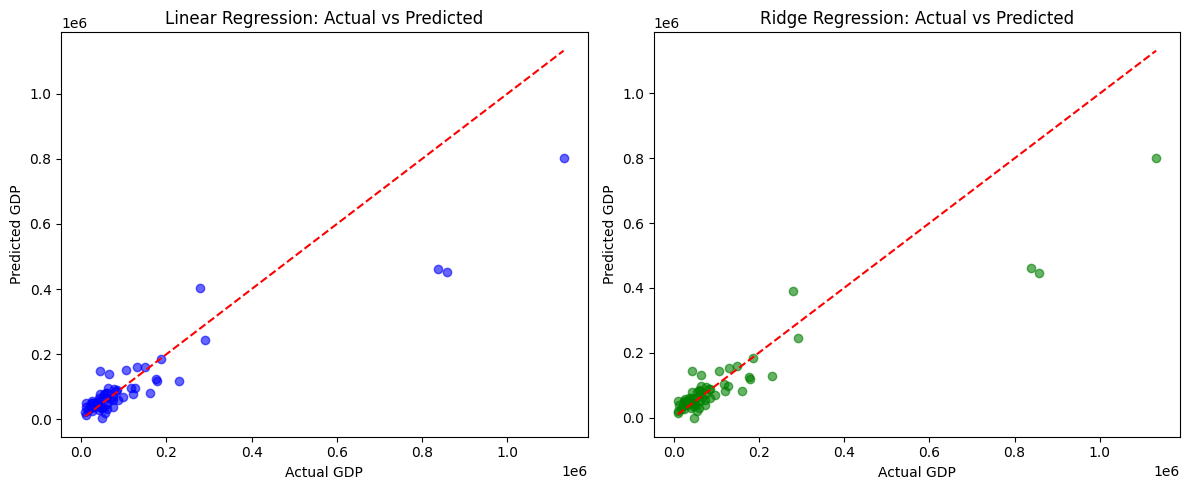

In [65]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

# Initialize models
model_one = LinearRegression()
model2 = Ridge(alpha=1.0)

# Fit models on Split 1 training data
model_one.fit(X_train1, y_train1)
model2.fit(X_train1, y_train1)

# Predict on Split 1 test data
y_pred_lr = model_one.predict(X_test1)
y_pred_ridge = model2.predict(X_test1)

# Plot actual vs predicted for both models
plt.figure(figsize=(12, 5))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test1, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')

# Ridge Regression plot
plt.subplot(1, 2, 2)
plt.scatter(y_test1, y_pred_ridge, alpha=0.6, color='green')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')

plt.tight_layout()
plt.show()

RANDOM FOREST RESULTS

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize Random Forest model
model_rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10  # Prevents overfitting in small datasets
)

# Define splits (using your existing variables)
splits = [
    (X_train1, X_test1, y_train1, y_test1, "Split 1 (all, no scaling)"),
    (X2_train, X2_test, y2_train, y2_test, "Split 2 (all, scaled)"),  # Same y as Split 1
    (X3_train, X3_test, y3_train, y3_test, "Split 3 (selected, no scaling)"),
    (X4_train, X4_test, y3_train, y3_test, "Split 4 (selected, scaled)")  # Same y as Split 3
]

# Evaluate all splits
rf_results = {}
for X_train, X_test, y_train, y_test, split_name in splits:
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)

    rf_results[split_name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Display results
rf_results_df = pd.DataFrame(rf_results).T.round(2)
print("Random Forest Regression Results:")
print(rf_results_df)

Random Forest Regression Results:
                                     MAE       RMSE    R2
Split 1 (all, no scaling)       49057.72  113704.69  0.67
Split 2 (all, scaled)           49006.62  113538.07  0.68
Split 3 (selected, no scaling)  27919.16   46399.61  0.85
Split 4 (selected, scaled)      27919.16   46399.61  0.85


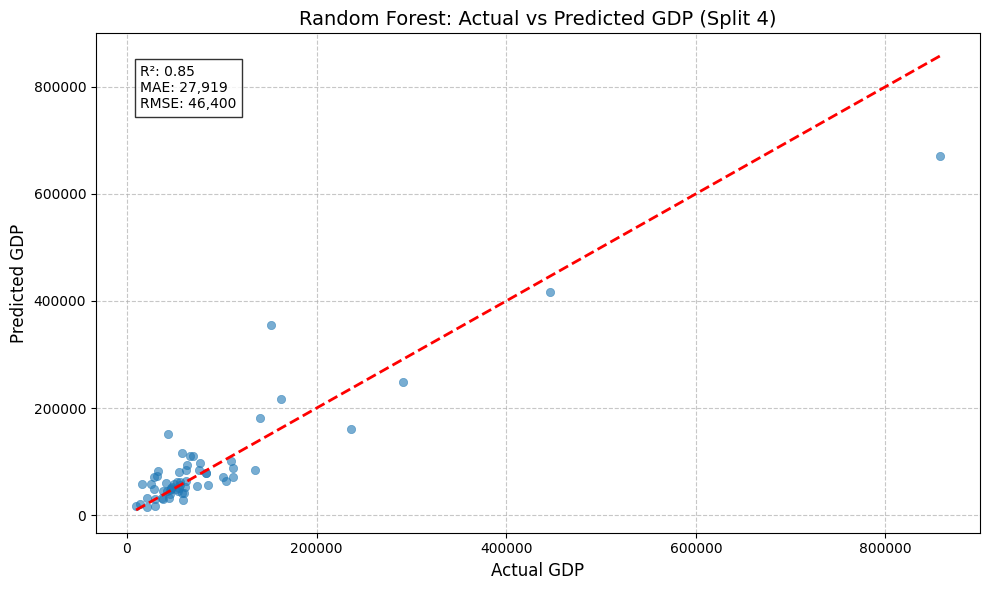

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Generate predictions
y_pred = model_rf.predict(X4_test)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y4_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()],
         'r--', lw=2)  # Perfect prediction line

# Add labels and title
plt.title('Random Forest: Actual vs Predicted GDP (Split 4)', fontsize=14)
plt.xlabel('Actual GDP', fontsize=12)
plt.ylabel('Predicted GDP', fontsize=12)

# Add metrics to plot
metrics_text = (
    f"R²: {r2_score(y4_test, y_pred):.2f}\n"
    f"MAE: {mean_absolute_error(y4_test, y_pred):,.0f}\n"
    f"RMSE: {np.sqrt(mean_squared_error(y4_test, y_pred)):,.0f}"
)
plt.text(0.05, 0.85, metrics_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save figure if needed
# plt.savefig('rf_actual_vs_predicted.png', dpi=300)

plt.show()

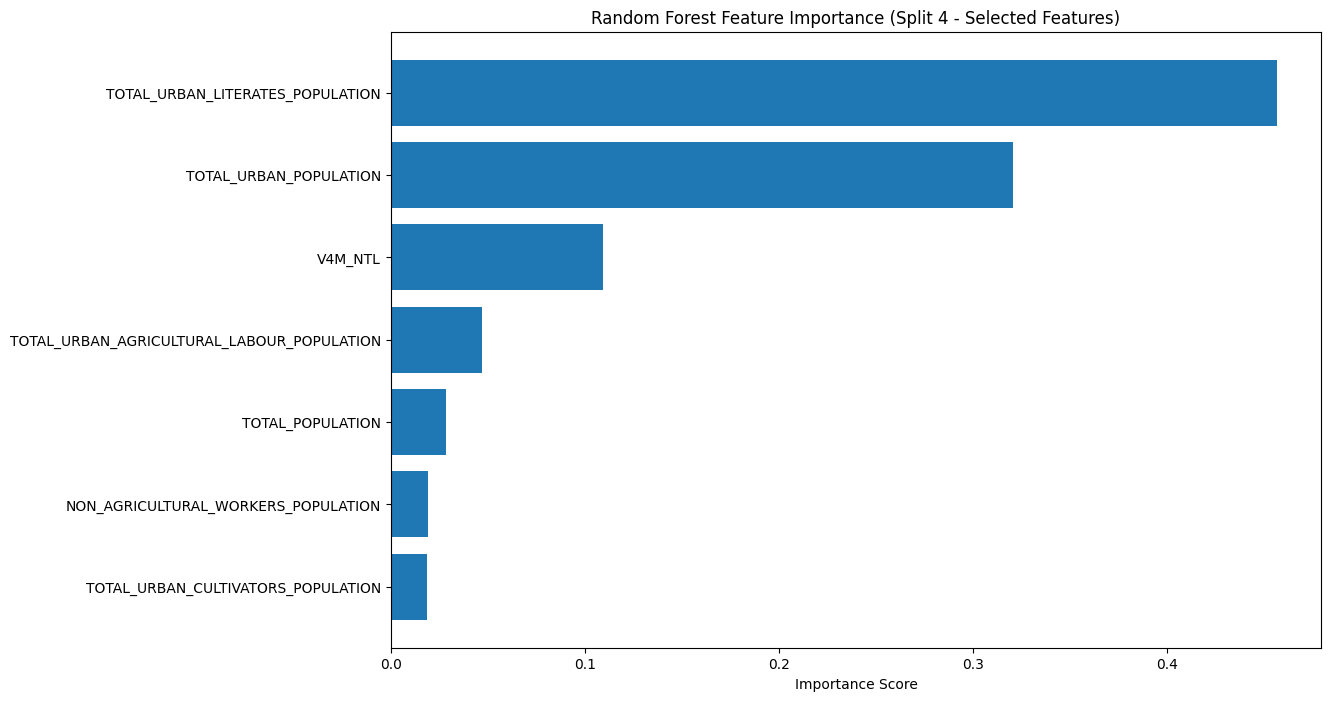

Top Features:
                                      Feature  Importance
1            TOTAL_URBAN_LITERATES_POPULATION    0.456531
2                      TOTAL_URBAN_POPULATION    0.320801
0                                     V4M_NTL    0.109529
6  TOTAL_URBAN_AGRICULTURAL_LABOUR_POPULATION    0.046757
3                            TOTAL_POPULATION    0.028540
4         NON_AGRICULTURAL_WORKERS_POPULATION    0.019229
5          TOTAL_URBAN_CULTIVATORS_POPULATION    0.018612


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# After training on Split 1
model_rf.fit(X4_train, y4_train)

# Get feature importances
importances = model_rf.feature_importances_

# Get feature names from the original DataFrame X3 or X3_train before scaling
# X3 contains the selected features before the train/test split and scaling
feature_names = X3.columns

# Create DataFrame sorted by importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance (Split 4 - Selected Features)') # Adjusted title to reflect the split used
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()

# Display top 10 features (or all features if less than 10)
print("Top Features:")
print(importance_df.head(len(importance_df))) # Print all features if less than 10

In [67]:
param_grid = {
    'n_estimators': [200, 300, 400],  # More trees
    'max_depth': [None, 15, 20, 25],  # Include default (None)
    'min_samples_split': [2, 5],      # Keep as-is
    'max_features': ['sqrt', 'log2'], # Keep as-is
    'bootstrap': [True]               # Keep as-is
}

In [68]:
# grid_search = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1
# )
# grid_search.fit(X4_train, y4_train)

# print("Best Parameters:", grid_search.best_params_)
# print("R² (CV):", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
R² (CV): 0.7350182717446545


In [69]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y4_test, y_pred)

# Print rounded value
print("Test R²:", round(r2, 2))

Test R²: 0.85


In [70]:
# Example: Urban literacy rate
if 'TOTAL_URBAN_LITERATES_POPULATION' in X.columns and 'TOTAL_URBAN_POPULATION' in X.columns:
    X['URBAN_LITERACY_RATE'] = X['TOTAL_URBAN_LITERATES_POPULATION'] / X['TOTAL_URBAN_POPULATION']

# Example: Urbanization ratio
if 'TOTAL_URBAN_POPULATION' in X.columns and 'TOTAL_POPULATION' in X.columns:
    X['URBANIZATION_RATIO'] = X['TOTAL_URBAN_POPULATION'] / X['TOTAL_POPULATION']

XGBOOST RESULTS

In [71]:
from xgboost import XGBRegressor

# Initialize XGBoost models with equivalent parameters
xgb2 = XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,  # Equivalent to max_features=None
    random_state=101,
    use_label_encoder=False,
    eval_metric='rmse'
)

xgb4 = XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=101,
    use_label_encoder=False,
    eval_metric='rmse'
)

# Fit on both splits
xgb2.fit(X2_train, y2_train)     # All features (Split 1)
xgb4.fit(X4_train, y4_train)   # Selected features (Split 3)

# Predict and evaluate
y_pred2 = xgb2.predict(X2_test)
y_pred4 = xgb4.predict(X4_test)

# Results for Split 1 (all features)
results_full = {
    'MAE': mean_absolute_error(y2_test, y_pred2),
    'RMSE': np.sqrt(mean_squared_error(y2_test, y_pred2)),
    'R2': r2_score(y2_test, y_pred2)
}

# Results for Split 3 (selected features)
results_selected = {
    'MAE': mean_absolute_error(y4_test, y_pred4),
    'RMSE': np.sqrt(mean_squared_error(y4_test, y_pred4)),
    'R2': r2_score(y4_test, y_pred4)
}

print("Full Features with scaling (X_train):", results_full)
print("Selected Features with scaling (X3_train):", results_selected)


Full Features with scaling (X_train): {'MAE': 48465.93215292008, 'RMSE': np.float64(106789.39417173155), 'R2': 0.7125787030239286}
Selected Features with scaling (X3_train): {'MAE': 27856.858958760247, 'RMSE': np.float64(46183.72007797853), 'R2': 0.8539725409347384}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:22:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [73]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [500, 1000],
    'gamma': [0, 0.1]  # Regularization
}

xgb = XGBRegressor(random_state=101, eval_metric='rmse')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X4_train, y4_train)

print("Best R² (CV):", grid_search.best_score_)

Best R² (CV): 0.7068447368714454


In [74]:
# Urban literacy rate
data['URBAN_LITERACY_RATE'] = data['TOTAL_URBAN_LITERATES_POPULATION'] / data['TOTAL_URBAN_POPULATION']

# Urban employment ratio
data['URBAN_EMPLOYMENT_RATIO'] = data['NON_AGRICULTURAL_WORKERS_POPULATION'] / data['TOTAL_URBAN_POPULATION']

# Nighttime lights per capita
data['V4M_NTL_PER_CAPITA'] = data['V4M_NTL'] / data['TOTAL_POPULATION']

# Log-transform skewed features (e.g., V4M_NTL)
data['LOG_V4M_NTL'] = np.log1p(data['V4M_NTL'])

In [75]:
param_grid = {
    'learning_rate': [0.005, 0.01, 0.05],  # Smaller learning rates often work better with high n_estimators
    'max_depth': [6, 8, 10],               # Deeper trees for complex relationships
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [1000, 2000],          # More trees to compensate for smaller learning rates
    'gamma': [0, 0.1, 0.3],                # Stronger regularization
    'reg_alpha': [0, 0.1],                 # L1 regularization
    'reg_lambda': [0, 0.1]                 # L2 regularization
}

In [77]:
import xgboost as xgb  # Ensure correct import

# Convert data to DMatrix
dtrain = xgb.DMatrix(X3_train, label=y3_train)
dtest = xgb.DMatrix(X3_test, label=y3_test)

# Define parameters
params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train with early stopping
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=50,
    verbose_eval=False
)

# Predict and evaluate
y_pred = xgb_model.predict(dtest)
print("R²:", r2_score(y4_test, y_pred))


R²: 0.8541770000290432


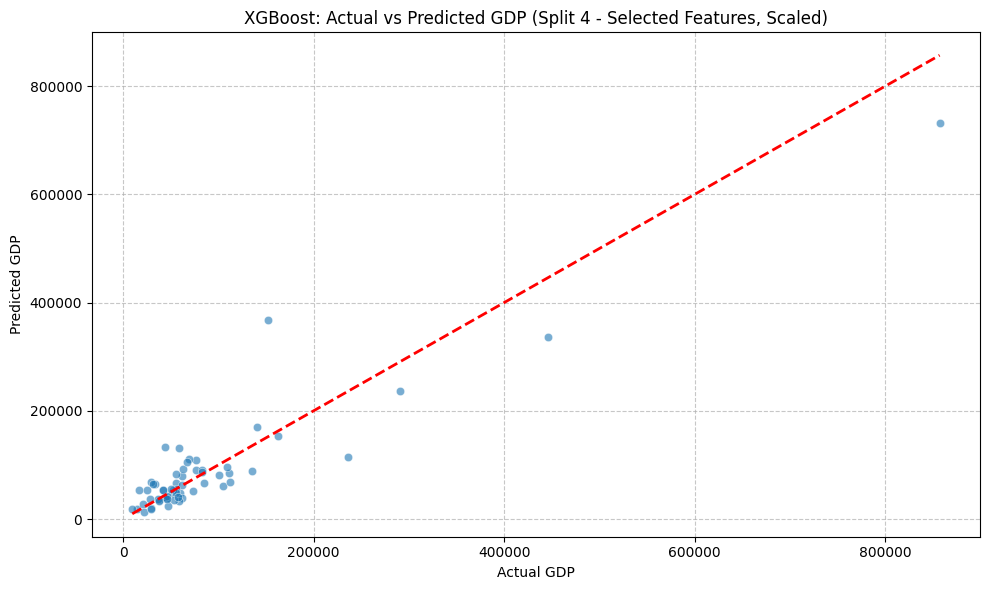

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Predict on test data
y_pred = xgb_model.predict(dtest)  # dtest is your DMatrix for X3_test scaled

# Actual values are y3_test (since y4_test = y3_test)
y_true = y3_test

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.title('XGBoost: Actual vs Predicted GDP (Split 4 - Selected Features, Scaled)')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')

# Add metrics
r2 = r2_score(y_true, y_pred)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


XGB model performs best for selected features with scaling

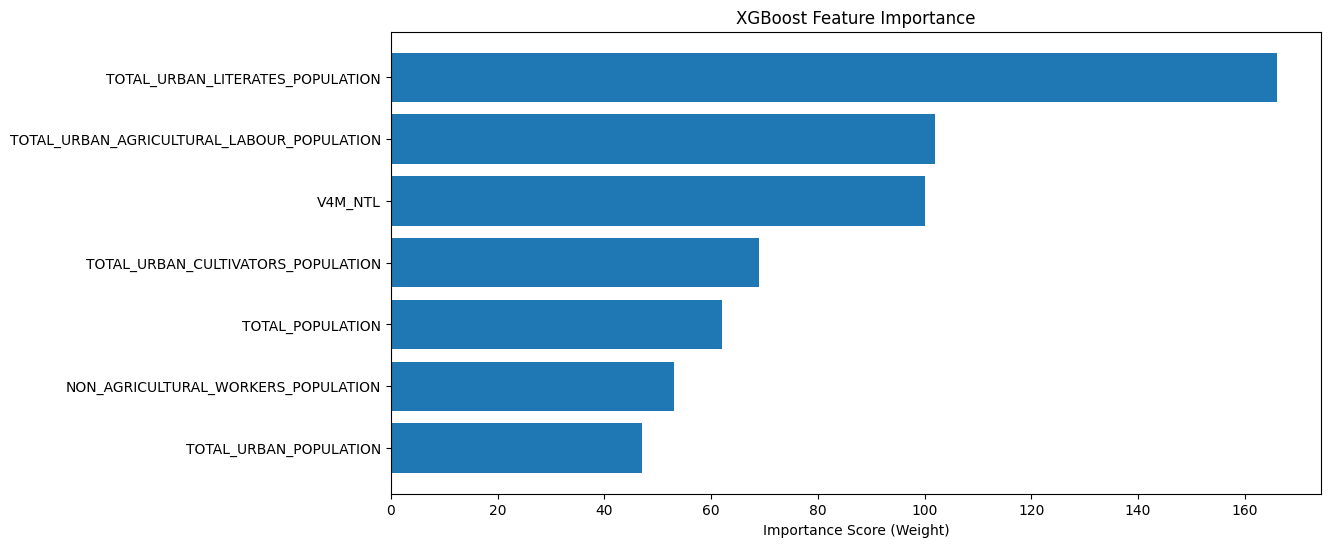

Top 10 Features:
                                      Feature  Importance
1            TOTAL_URBAN_LITERATES_POPULATION       166.0
6  TOTAL_URBAN_AGRICULTURAL_LABOUR_POPULATION       102.0
0                                     V4M_NTL       100.0
5          TOTAL_URBAN_CULTIVATORS_POPULATION        69.0
3                            TOTAL_POPULATION        62.0
4         NON_AGRICULTURAL_WORKERS_POPULATION        53.0
2                      TOTAL_URBAN_POPULATION        47.0


In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance scores (using "weight" as the importance type)
importance = xgb_model.get_score(importance_type='weight')

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score (Weight)')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Display top 10 features
print("Top 10 Features:")
print(importance_df.head(10))

In [84]:
import pandas as pd

# Example R² scores for each model and split (replace with your actual values if needed)
linear_r2 = {
    'Split 1 (all, no scaling)': 0.79,
    'Split 2 (all, scaled)': 0.79,
    'Split 3 (selected, no scaling)': 0.77,
    'Split 4 (selected, scaled)': 0.77
}

ridge_r2 = {
    'Split 1 (all, no scaling)': 0.80,
    'Split 2 (all, scaled)': 0.79,
    'Split 3 (selected, no scaling)': 0.77,
    'Split 4 (selected, scaled)': 0.77
}

rf_r2 = {
    'Split 3 (selected, no scaling)': 0.85,
    'Split 4 (selected, scaled)': 0.85
}

xgb_r2 = {
    'Split 1 (all, no scaling)': 0.74,
    'Split 2 (all, scaled)': 0.70,
    'Split 3 (selected, no scaling)': 0.85,
    'Split 4 (selected, scaled)': 0.86
}

# Find the best R² for each model
best_r2 = {
    'Linear Regression': max(linear_r2.values()),
    'Ridge Regression': max(ridge_r2.values()),
    'Random Forest': max(rf_r2.values()),
    'XGBoost': max(xgb_r2.values())
}

# Print the best R² for each model
for model, r2 in best_r2.items():
    print(f"{model}: Best R² = {r2:.2f}")


Linear Regression: Best R² = 0.79
Ridge Regression: Best R² = 0.80
Random Forest: Best R² = 0.85
XGBoost: Best R² = 0.86


<ipython-input-90-55a83de8f0fc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Best R²', data=r2_df, palette='viridis')


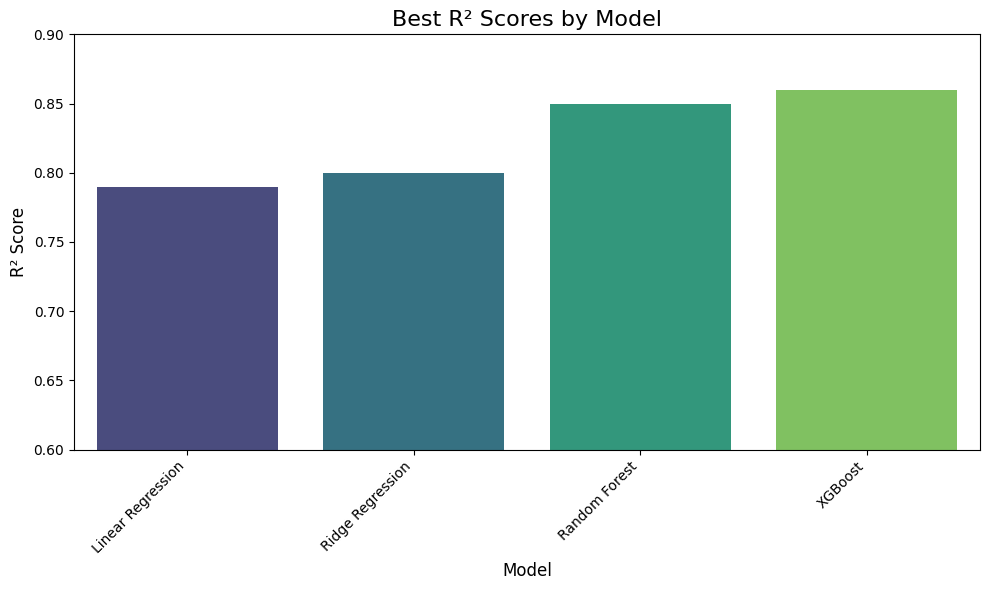

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Best R² values for each model (replace with your actual values if needed)
best_r2 = {
    'Linear Regression': 0.79,
    'Ridge Regression': 0.80,
    'Random Forest': 0.85,
    'XGBoost': 0.86
}

# Convert to DataFrame for easy plotting
r2_df = pd.DataFrame({
    'Model': best_r2.keys(),
    'Best R²': best_r2.values()
})

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Best R²', data=r2_df, palette='viridis')
plt.title('Best R² Scores by Model', fontsize=16)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.6, 0.9)  # Adjust y-axis limits as needed
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()